# Evaluación estadística para el Trabajo de grado

Trabajo de grado, Maestría en Administración Financiera.  
En el desarrollo del segundo objetivo del trabajo de grado (adaptar el modelo financiero escogido a la situación colombiana), surge la necesidad de evaluar el comportamiento de los precios de la energía, en el mercado regulado y en el no regulado.  
A continuación, se hace un análisis exploratorio de los datos de precios de la energía en Colombia de los últimos 20 años, para intentar modelar el comportamiento futuro.  

## Objetivos
1. Evaluar si hay razones para trabajar con precios de bolsa o si es preferible quedarse sólo con los PPA.
1. Justificar qué tarifas (en particular, qué crecimiento de las tarifas) se van a tomar en los escenarios. 
1. Intentar predecir el comportamiento futuro de los precios de la energía. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.stats import kstes

In [2]:
precios = pd.read_csv("precioenergia.csv", sep=";")
precios['Fecha'] = pd.to_datetime(precios['Fecha'])
precios[['PPP Mercado No Regulado']] = precios[['PPP Mercado No Regulado']].interpolate()
precios["PPP Mercado Regulado"] = precios["PPP Mercado Regulado"].interpolate()
precios["Suma de Precio Bolsa Nacional Ponderado Diario"] = precios["Suma de Precio Bolsa Nacional Ponderado Diario"].interpolate()

In [3]:
precios.head()

,Fecha,PPP Mercado No Regulado,PPP Mercado Regulado,Suma de Precio Bolsa Nacional Ponderado Diario
0,2004-02-11,64.337101,79.732294,73.388964
1,2004-02-12,64.344195,79.762210,73.236862
2,2004-02-13,63.904764,79.704978,69.876568
3,2004-02-14,63.919452,79.723403,74.297064
4,2004-02-15,63.746909,80.153817,74.413961


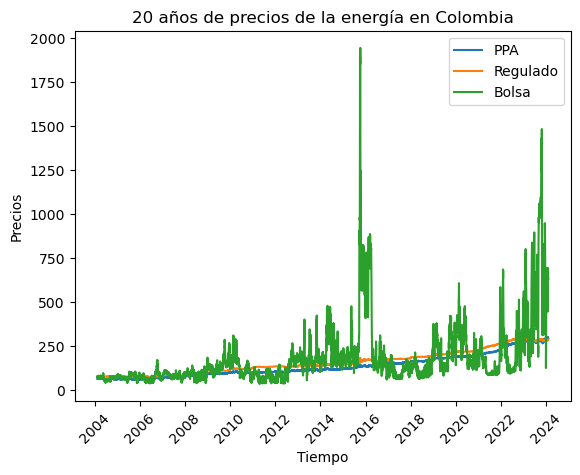

In [4]:
plt.plot(precios["Fecha"], precios["PPP Mercado No Regulado"], label="PPA")
plt.plot(precios["Fecha"], precios["PPP Mercado Regulado"], label="Regulado")
plt.plot(precios["Fecha"], precios["Suma de Precio Bolsa Nacional Ponderado Diario"], label="Bolsa")

plt.xlabel("Tiempo")
plt.ylabel("Precios")
plt.title("20 años de precios de la energía en Colombia")
plt.legend()

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formato de fecha
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))
plt.xticks(rotation=45)

# Ajustar el tamaño de la figura
# plt.gcf().set_size_inches(10, 6)

plt.savefig("grafica1.png", dpi=300)
plt.show()

In [5]:
retornos = pd.DataFrame()
retornos['Fecha'] = precios["Fecha"]

retornos['PPA'] = precios["PPP Mercado No Regulado"].pct_change().dropna()
retornos['Regulado'] = precios["PPP Mercado Regulado"].pct_change().dropna()
retornos['Bolsa'] = precios["Suma de Precio Bolsa Nacional Ponderado Diario"].pct_change().dropna()

retornos.head()

,Fecha,PPA,Regulado,Bolsa
0,2004-02-11,NaN,NaN,NaN
1,2004-02-12,0.000110,0.000375,-0.002073
2,2004-02-13,-0.006829,-0.000718,-0.045883
3,2004-02-14,0.000230,0.000231,0.063261
4,2004-02-15,-0.002699,0.005399,0.001573


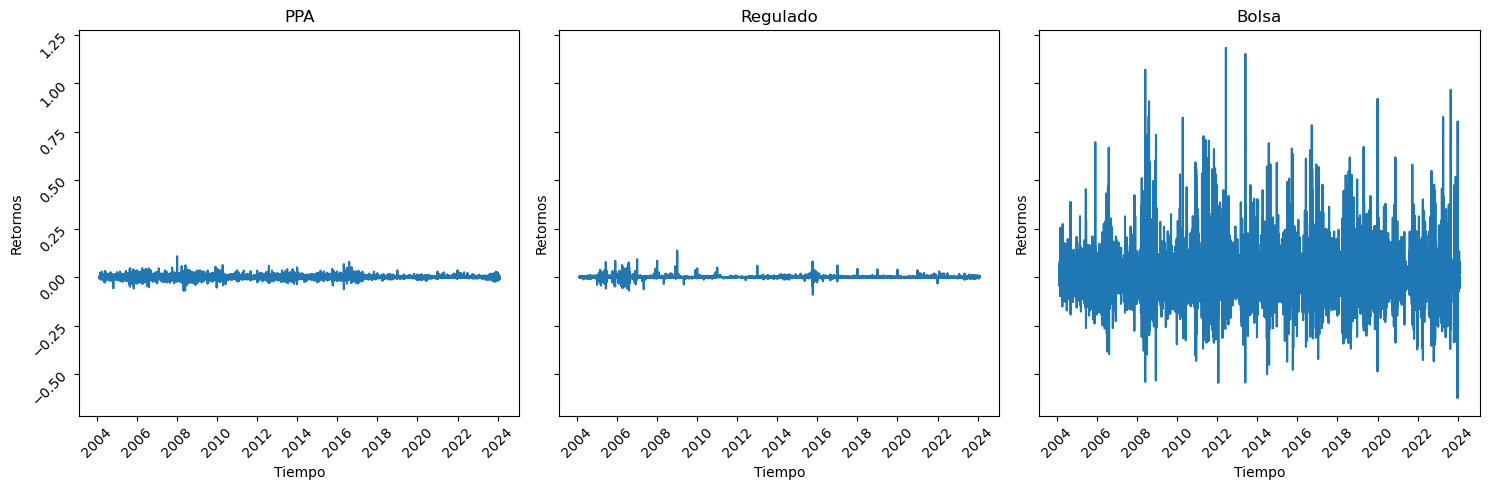

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Graficar los retornos en cada subgráfica
axs[0].plot(retornos['Fecha'], retornos['PPA'], label="PPA")
axs[0].set_title('PPA')

axs[1].plot(retornos['Fecha'], retornos['Regulado'], label="Regulado")
axs[1].set_title('Regulado')

axs[2].plot(retornos['Fecha'], retornos['Bolsa'], label="Bolsa")
axs[2].set_title('Bolsa')

# Ajustar etiquetas y título común
for ax in axs:
    ax.set_xlabel("Tiempo")
    ax.set_ylabel("Retornos")
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formato de fecha
    ax.xaxis.set_major_locator(mdates.YearLocator(2))
    ax.tick_params(rotation=45)
    
# Ajustar espacio entre subgráficas
plt.tight_layout()

# Guardar la figura en un archivo con mayor resolución
plt.savefig("grafica2.png", dpi=300)

# Mostrar la gráfica
plt.show()

In [7]:
costos = pd.read_csv("costo historico.csv", sep=";")
costos['Fecha'] = pd.to_datetime(costos['Fecha'])
costos.head()

/var/folders/fj/m5l0ynr5059cvdqxm37ypbmc0000gn/T/ipykernel_8677/2161867659.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  costos['Fecha'] = pd.to_datetime(costos['Fecha'])


,Fecha,IPC,AOM
0,2004-01-01,53.54,8.134070
1,2004-01-02,54.18,8.840025
2,2004-01-03,54.71,8.185338
3,2004-01-04,54.96,8.862909
4,2004-01-05,55.17,8.344865


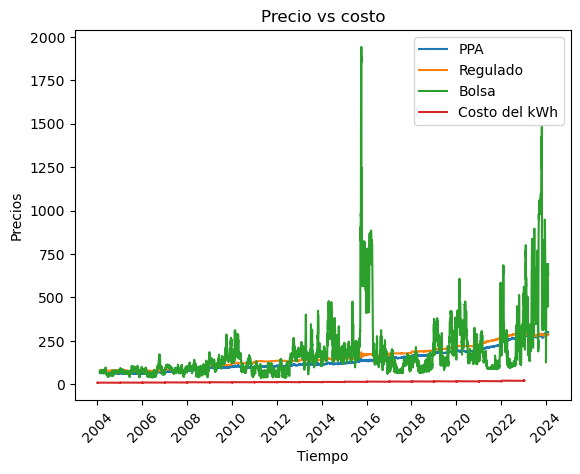

In [8]:
plt.plot(precios["Fecha"], precios["PPP Mercado No Regulado"], label="PPA")
plt.plot(precios["Fecha"], precios["PPP Mercado Regulado"], label="Regulado")
plt.plot(precios["Fecha"], precios["Suma de Precio Bolsa Nacional Ponderado Diario"], label="Bolsa")
plt.plot(costos["Fecha"], costos["AOM"], label="Costo del kWh")

plt.xlabel("Tiempo")
plt.ylabel("Precios")
plt.title("Precio vs costo")
plt.legend()

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formato de fecha
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))
plt.xticks(rotation=45)

# Ajustar el tamaño de la figura
# plt.gcf().set_size_inches(10, 6)

plt.savefig("grafica3.png", dpi=300)
plt.show()

In [13]:
estadisticas = retornos.describe()
print(estadisticas)

                               Fecha          PPA     Regulado        Bolsa
count                           7300  7299.000000  7299.000000  7299.000000
mean   2014-02-07 12:00:00.000000256     0.000255     0.000199     0.008245
min              2004-02-11 00:00:00    -0.070620    -0.091191    -0.625314
25%              2009-02-08 18:00:00    -0.003750    -0.001087    -0.053985
50%              2014-02-07 12:00:00    -0.000092    -0.000022    -0.001416
75%              2019-02-06 06:00:00     0.003885     0.000991     0.055593
max              2024-02-05 00:00:00     0.107783     0.136942     1.183643
std                              NaN     0.009599     0.006871     0.130156


In [21]:
posit_PPA = (retornos[['PPA']] >= 0).sum()
posit_regul = (retornos[['Regulado']] >= 0).sum()
posit_bolsa = (retornos[['Bolsa']] >= 0).sum()
print(posit_PPA, posit_regul, posit_bolsa)

PPA    3596
dtype: int64 Regulado    3578
dtype: int64 Bolsa    3575
dtype: int64


(array([6.000e+00, 1.600e+01, 2.260e+02, 3.873e+03, 2.929e+03, 2.190e+02,
        2.200e+01, 6.000e+00, 1.000e+00, 1.000e+00]),
 array([-0.07062038, -0.05278008, -0.03493978, -0.01709947,  0.00074083,
         0.01858113,  0.03642144,  0.05426174,  0.07210204,  0.08994235,
         0.10778265]),
 <BarContainer object of 10 artists>)

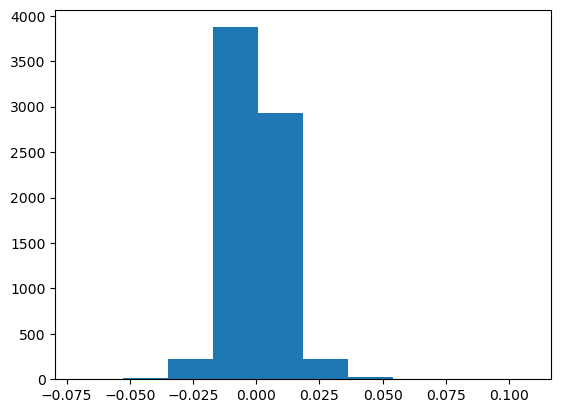

In [22]:
plt.hist(retornos[['PPA']])

(array([2.000e+00, 9.000e+00, 5.000e+01, 3.874e+03, 3.283e+03, 6.200e+01,
        1.200e+01, 5.000e+00, 1.000e+00, 1.000e+00]),
 array([-9.11910261e-02, -6.83777411e-02, -4.55644561e-02, -2.27511711e-02,
         6.21138847e-05,  2.28753989e-02,  4.56886839e-02,  6.85019689e-02,
         9.13152539e-02,  1.14128539e-01,  1.36941824e-01]),
 <BarContainer object of 10 artists>)

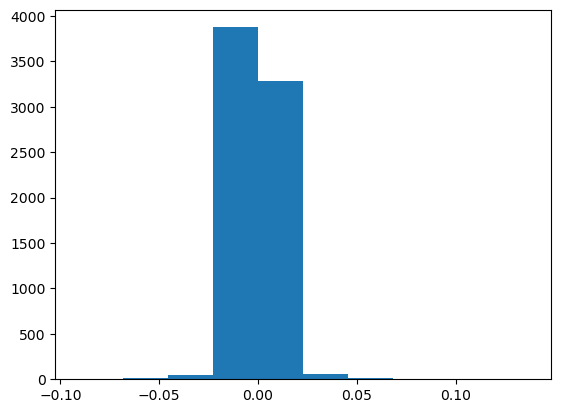

In [23]:
plt.hist(retornos[['Regulado']])

(array([9.000e+00, 1.030e+02, 1.169e+03, 4.863e+03, 9.140e+02, 1.680e+02,
        5.000e+01, 1.400e+01, 6.000e+00, 3.000e+00]),
 array([-0.62531407, -0.44441836, -0.26352266, -0.08262696,  0.09826874,
         0.27916445,  0.46006015,  0.64095585,  0.82185155,  1.00274725,
         1.18364296]),
 <BarContainer object of 10 artists>)

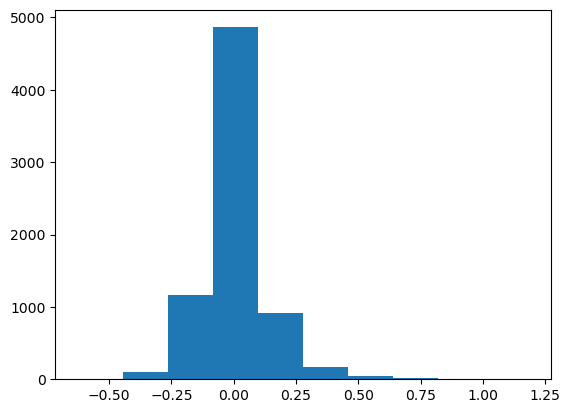

In [24]:
plt.hist(retornos[['Bolsa']])

In [34]:
estadistico, p_valor = kstest(retornos['PPA'], 'norm')
print(f"Estadístico de prueba: {estadistico}")
print(f"P-valor: {p_valor}")
if p_valor > 0.05:
    print("No se rechaza la hipótesis nula: los datos podrían provenir de una distribución normal.")
else:
    print("Se rechaza la hipótesis nula: los datos no provienen de una distribución normal.")

Estadístico de prueba: nan
P-valor: nan
Se rechaza la hipótesis nula: los datos no provienen de una distribución normal.


In [35]:
estadistico, p_valor = kstest(retornos['Regulado'], 'norm')
print(f"Estadístico de prueba: {estadistico}")
print(f"P-valor: {p_valor}")
if p_valor > 0.05:
    print("No se rechaza la hipótesis nula: los datos podrían provenir de una distribución normal.")
else:
    print("Se rechaza la hipótesis nula: los datos no provienen de una distribución normal.")

Estadístico de prueba: nan
P-valor: nan
Se rechaza la hipótesis nula: los datos no provienen de una distribución normal.


In [36]:
estadistico, p_valor = kstest(retornos['Bolsa'], 'norm')
print(f"Estadístico de prueba: {estadistico}")
print(f"P-valor: {p_valor}")
if p_valor > 0.05:
    print("No se rechaza la hipótesis nula: los datos podrían provenir de una distribución normal.")
else:
    print("Se rechaza la hipótesis nula: los datos no provienen de una distribución normal.")

Estadístico de prueba: nan
P-valor: nan
Se rechaza la hipótesis nula: los datos no provienen de una distribución normal.
